In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
from sklearn.datasets import make_classification

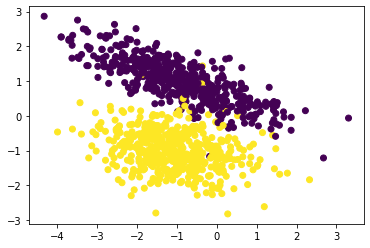

In [145]:
X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,n_classes=2, n_clusters_per_class=1, 
                    random_state=54)

plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [148]:
mu = X.mean(axis = 0)
sigma = X.std(axis = 0)
X = (X-mu)/sigma

In [149]:
ones = np.ones((X.shape[0], 1))
X = np.append(ones, X, axis = 1)

In [150]:
Y = Y.reshape((-1,1))

In [151]:
X, Xt, Y, Yt = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [152]:
print(X.shape)
print(Y.shape)

(800, 3)
(800, 1)


In [153]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def hypothesis(X, theta):
    return sigmoid(X.dot(theta))

def loss_like(X, theta, Y):
    ht = hypothesis(X, theta)
    return -1*((Y.T.dot(np.log2(ht)) + (1-Y).T.dot(np.log2(1 - ht)))[0,0])/X.shape[0]

def gradient(X, theta, Y):
    ht = hypothesis(X, theta)
    return X.T.dot(ht - Y)/X.shape[0]

def gradient_descent(X, Y, lr = 0.4, epochs = 1000):
    m, n = X.shape
    theta = np.zeros((n,1))
    loss = []
    for i in range(epochs):
        theta -= lr*gradient(X, theta, Y)
        loss.append(loss_like(X, theta, Y))
    return hypothesis(X, theta), loss, theta

In [154]:
Y_pred, loss, theta = gradient_descent(X, Y)

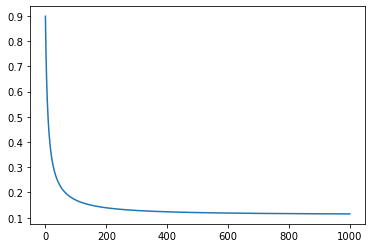

In [155]:
plt.plot(loss)
plt.show()

In [156]:
Y_pred[Y_pred < 0.5] = 0
Y_pred[Y_pred >= 0.5] = 1

In [157]:
print((Y == Y_pred).sum()/Y.shape[0])

0.975


In [158]:
Yp = sigmoid(Xt.dot(theta))
Yp[Yp < 0.5] = 0
Yp[Yp >= 0.5] = 1

In [159]:
(Yp == Yt).sum()/Yp.shape[0]

0.995